In [1]:
import numpy as np
import pandas as pd
from obspy import Trace
from datetime import datetime
import matplotlib.pyplot as plt
import ruptures as rpt



In [2]:

# def sta_lta(data, nsta, nlta):
#     sta = np.convolve(np.abs(data), np.ones(nsta) / nsta, mode='same')
#     lta = np.convolve(np.abs(data), np.ones(nlta) / nlta, mode='same')
#     lta[lta == 0] = 1e-10  # Avoid division by zero
#     return sta / lta

# Load catalog
cat_directory = '../data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

# Extract row information
row = cat.iloc[6]
arrival_time_rel = row['time_rel(sec)']
test_filename = row.filename

data_directory = '../data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)



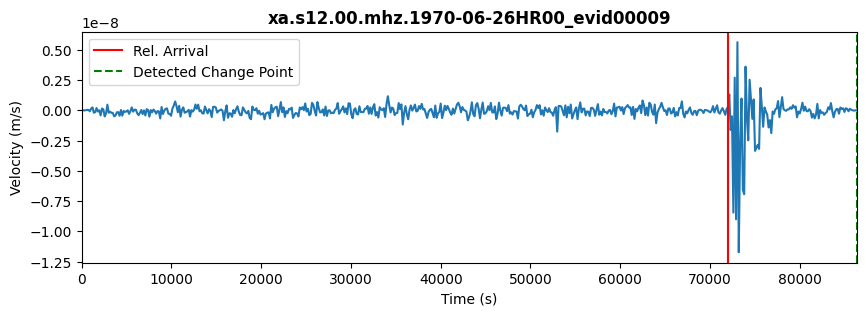

Detected change points at: [] seconds


In [5]:

# Load event data
data_directory = '../data/lunar/training/data/S12_GradeA/'
csv_file = f'{data_directory}{test_filename}.csv'
data_cat = pd.read_csv(csv_file)

# Extract amplitude (velocity) and time
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Use a smaller subset of data for testing (optional)
csv_data = csv_data[::1000]  # Adjust the number to a manageable size for testing
csv_times = csv_times[::1000]

# Apply ruptures change point detection with a simpler algorithm (e.g., Pelt)
algo = rpt.Pelt(model="rbf").fit(csv_data)
penalty = 25
change_points = algo.predict(pen=penalty)

# Original plot
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
plot_indices = np.linspace(0, len(csv_times) - 1, 1000, dtype=int)  # Downsample for plotting
ax.plot(csv_times[plot_indices], csv_data[plot_indices])

ax.set_xlim([min(csv_times), max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{test_filename}', fontweight='bold')

# Plot relative arrival time
arrival_line = ax.axvline(x=arrival_time_rel, c='red', label='Rel. Arrival')

# Add detected change points to the original plot
for cp in change_points:
    ax.axvline(x=csv_times[cp - 1], color='green', linestyle='--', label='Detected Change Point')

# Ensure labels are unique in the legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys())

plt.show()

# Print detected change points
print(f"Detected change points at: {csv_times[change_points[:-1]]} seconds")

In [12]:
sorted_time = np.sort(data_cat['time_rel(sec)'])

In [19]:
np.where(data_cat['velocity(m/s)']>10**-8)

(array([478809, 478942, 478949, ..., 496438, 496767, 498207]),)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks

cat_directory = '../data/lunar/training/data/S12_GradeA/'
cat_file = cat_directory + 'xa.s12.00.mhz.1970-01-19HR00_evid00002.csv'
cat = pd.read_csv(cat_file)

cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-01-19T00:00:00.665000,0.000000,-6.153279e-14
1,1970-01-19T00:00:00.815943,0.150943,-7.701288e-14
2,1970-01-19T00:00:00.966887,0.301887,-8.396187e-14
3,1970-01-19T00:00:01.117830,0.452830,-8.096155e-14
4,1970-01-19T00:00:01.268774,0.603774,-7.097599e-14
...,...,...,...
572410,1970-01-20T00:00:02.174434,86401.509434,-1.472713e-14
572411,1970-01-20T00:00:02.325377,86401.660377,-1.956104e-14
572412,1970-01-20T00:00:02.476321,86401.811321,-2.240307e-14
572413,1970-01-20T00:00:02.627264,86401.962264,-2.998405e-14
